<a href="https://colab.research.google.com/github/fppfurtado/mvp-pos-ciencia-de-dados/blob/main/Projeto_MVP_Sprint_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA 1: REGRESSÃO LINEAR DE TAXA DE JUROS DE TÍTULOS PÚBLICOS FEDERAIS

## 1. Definição do Problema

### Objetivo
O presente projeto tem como objetivo a construção de um modelo de regressão linear para auxiliar o investidor a decidir o melhor momento de marcar a mercado seu título público, prevendo as taxas de juros ofertadas por títulos públicos federais - e, consequentemente, seus preços unitários - a partir dos valores da taxa de câmbio dolar/real (Ptax), do índice IBOVESPA e do CDS Brasil 5 anos.

### Títulos Públicos Federais
Títulos Públicos Federais são títulos de dívida emitidos pelo Governo Federal para financiar suas atvidades captando recursos de particulares em troca de pagamento de juros sobre um capital aplicado. Na prática, são **ativos de renda fixa** que possuem preço, taxa e vencimento definidos, e que podem ser adquiridos por investidores interessados.

Esses ativos possuem liquidez diária, podendo o investidor solicitar o resgate a qualquer tempo (durante o horário de funcionamento do mercado de títulos publicos), porém nesse caso o valor utilizado para o cálculo da rentabilidade será o **valor de mercado do título** no dia da solicitação de resgate, a chamada **Marcação a Mercado**, que pode fazer com que o investidor tenha ou lucro acima do esperado ou prejuízo no resgate antecipado.

O preço dos títulos públicos variam em função das respectivas taxas ofertadas. E as taxas variam diariamente, basicamente, em função da percepção de risco do mercado em relação à economia do país. Por isso, após alguma notícia negativa no cenário econômico, é comum observar fenômenos como "queda na bolsa", "alta no dolar" e "alta nos juros" pagos pelos títulos públicos federais.

### IBOVESPA
O Ibovespa é o principal indicador de desempenho das ações negociadas na B3 e reúne as empresas mais importantes do mercado de capitais brasileiro. Foi criado em 1968 e, ao longo desses 50 anos, consolidou-se como referência para investidores ao redor do mundo.

Reavaliado a cada quatro meses, o índice é resultado de uma carteira teórica de ativos. É composto pelas ações e units de companhias listadas na B3 que atendem aos critérios descritos na sua metodologia, correspondendo a cerca de 80% do número de negócios e do volume financeiro do nosso mercado de capitais.

Fonte: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

### PTax
Ptax é uma taxa de câmbio calculada durante o dia pelo Banco Central do Brasil. Consiste na média das taxas de compra e de venda informadas pelas instituições financeiras durante 4 janelas do dia. É a taxa de referencia para o valor do dólar de D2 (em dois dias úteis). Normalmente, os contratos de derivativos de câmbio são liquidados com base na PTAX divulgada para o dia útil anterior.

Fonte: https://pt.wikipedia.org/wiki/Ptax

### CDS Brasil
CDS (credit default swap) é a troca de risco de crédito. O CDS é um contrato derivativo que funciona como um seguro para quem empresta dinheiro. Por levar em sua precificação o risco de inadimplência do tomador do empréstimo, o CDS é muito usado como termômetro para o risco de um país.

Fonte: https://inteligenciafinanceira.com.br/glossario/credit-default-swap-cds-risco-pais/

## 2. Coleta e Análise de Dados

### Importação de Pacotes e Módulos

In [ ]:
# Importando pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

### Configurações prévias

In [ ]:
# Suprimindo warnings
warnings.filterwarnings('ignore')

### Carregamento e Preparação

Serão carregados os datasets dos dados históricos das quatro variáveis econômicas que serão tratadas posteriormente pelo modelo de regressão linear:

+ taxas e preços de título públicos federais
+ taxa de câmbio PTax
+ índice IBOVESPA
+ CDS Brasil 5 anos.

In [ ]:
# Carregando o histórico de preços de preços e taxas de títulos públicos
historico_titulos = pd.read_csv('https://github.com/fppfurtado/mvp-pos-ciencia-de-dados/raw/main/DADOS/historico_titulos.csv', decimal = ',')
# Carregando o histórico do índice IBOVESPA
historico_ibov = pd.read_csv('https://raw.githubusercontent.com/fppfurtado/mvp-pos-ciencia-de-dados/main/DADOS/historico_ibov.csv', decimal = ',')
# Carregando o histórico da taxa de câmbio PTax
historico_ptax = pd.read_csv('https://raw.githubusercontent.com/fppfurtado/mvp-pos-ciencia-de-dados/main/DADOS/historico_ptax.csv', decimal = ',')
# Carregando o histórico do CDS Brasil 5 Anos
historico_cds5y = pd.read_csv('https://raw.githubusercontent.com/fppfurtado/mvp-pos-ciencia-de-dados/main/DADOS/historico_csd5y.csv', decimal = ',')

Cada dataset possui um conjunto de atributos próprio, muitos dos quais não serão relevantes em nosso projeto. Por esse motivo, selecionaremos apenas os atributos relevantes e faremos a junção em um dataset final de trabalho utilizando como chave os atributos temporais (datas).

In [ ]:
# exibindo os nomes das colunas (atributos) dos datasets
print('atributos titulos:', historico_titulos.columns, '\n')
print('atributos ibov:', historico_ibov.columns, '\n')
print('atributos ptax:', historico_ptax.columns, '\n')
print('atributos cds5y:', historico_cds5y.columns, '\n')

atributos titulos: Index(['Tipo Titulo', 'Data Vencimento', 'Data Base', 'Taxa Compra Manha',
       'Taxa Venda Manha', 'PU Compra Manha', 'PU Venda Manha',
       'PU Base Manha'],
      dtype='object') 

atributos ibov: Index(['direction_color', 'rowDate', 'rowDateRaw', 'rowDateTimestamp',
       'last_close', 'last_open', 'last_max', 'last_min', 'volume',
       'volumeRaw', 'change_precent', 'last_closeRaw', 'last_openRaw',
       'last_maxRaw', 'last_minRaw', 'change_precentRaw'],
      dtype='object') 

atributos ptax: Index(['data', 'valor'], dtype='object') 

atributos cds5y: Index(['direction_color', 'rowDate', 'rowDateRaw', 'rowDateTimestamp',
       'last_close', 'last_open', 'last_max', 'last_min', 'volume',
       'volumeRaw', 'change_precent', 'last_closeRaw', 'last_openRaw',
       'last_maxRaw', 'last_minRaw', 'change_precentRaw'],
      dtype='object') 



Para o histórico de títulos públicos, selecionaremos os atributos: Tipo Titulo, Data Vencimento, Data Base, Taxa Venda Manha.

In [ ]:
# reduzindo o dataset historico_titulos por meio da seleção de atributos relevantes
historico_titulos = historico_titulos[['Tipo Titulo', 'Data Vencimento', 'Data Base', 'Taxa Venda Manha']]

Para o histórico do Ibovespa, selecionaremos os atributos: rowDate, volumeRaw, change_precent.

In [ ]:
# reduzindo o dataset historico_ibov por meio da seleção de atributos relevantes
historico_ibov = historico_ibov[['rowDate', 'volumeRaw', 'change_precent']]

Para o histórico da taxa de câmbio, como são apenas dois atributos, manteremos a mesma configuração.

Para o histórico do CDS Brasil 5 Anos, selecionaremos os atributos: rowDate, volumeRaw e change_precent.

In [ ]:
# reduzindo o dataset historico_csd5y por meio da seleção de atributos relevantes
historico_cds5y = historico_cds5y[['rowDate', 'change_precent']]

Vamos garantir que os atributos temporais que sequenciam as séries históricas estejam armazenados como data, a fim de utilizá-los como chaves na junção dos datasets.

In [ ]:
# ajustando tipos dos atributos temporais
historico_titulos['Data Base'] = historico_titulos['Data Base'].astype('datetime64')
historico_ibov['rowDate'] = historico_ibov['rowDate'].astype('datetime64')
historico_ptax['data'] = historico_ptax['data'].astype('datetime64')
historico_cds5y['rowDate'] = historico_cds5y['rowDate'].astype('datetime64')

Vamos agora juntar os datasets com base nos atributos temporais.

In [ ]:
# mesclando o historico de titulos com o historico ibov com base em atributo de data
df_merge = pd.merge(historico_titulos, historico_ibov, left_on='Data Base', right_on='rowDate', suffixes=('_titulos', '_ibov'))
# mesclando o dataset df_merge com o historico ptax com base em atributo de data
df_merge = pd.merge(df_merge, historico_ptax, left_on='Data Base', right_on='data', suffixes=('_titulos', '_ptax'))
# mesclando o dataset df_merge com o historico CDS 5 anos com base em atributo de data
df_merge = pd.merge(df_merge, historico_cds5y, left_on='Data Base', right_on='rowDate', suffixes=('_ibov', '_cds'))
# exibindo as primeiras linhas para visualização do resultado
df_merge.head(5)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Venda Manha,rowDate_ibov,volumeRaw,change_precent_ibov,data,valor,rowDate_cds,change_precent_cds
0,Tesouro Prefixado com Juros Semestrais,2029-01-01,2020-12-17,6.97,2020-12-17,7701390,0.46,2020-12-17,5.0606,2020-12-17,-1.26
1,Tesouro IPCA+,2026-08-15,2020-12-17,2.54,2020-12-17,7701390,0.46,2020-12-17,5.0606,2020-12-17,-1.26
2,Tesouro IPCA+,2024-08-15,2020-12-17,1.79,2020-12-17,7701390,0.46,2020-12-17,5.0606,2020-12-17,-1.26
3,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2020-12-17,-0.3,2020-12-17,7701390,0.46,2020-12-17,5.0606,2020-12-17,-1.26
4,Tesouro Prefixado,2023-01-01,2020-12-17,4.61,2020-12-17,7701390,0.46,2020-12-17,5.0606,2020-12-17,-1.26


Por fim, vamos eliminar os atributos temporais duplicados e renomear alguns atributos.

In [ ]:
# eliminando atributos irrelevantes
df_merge = df_merge.drop(columns=['rowDate_ibov', 'data', 'rowDate_cds'])
# renomeando atributos
df_merge = df_merge.rename(columns={
    'volumeRaw': 'Volume IBOV',
    'change_precent_ibov': 'Variação IBOV',
    'valor': 'Valor Dolar',
    'change_precent_cds': 'Variação CDS'
})
# exibindo as primeiras linhas
df_merge.head(5)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Venda Manha,Volume IBOV,Variação IBOV,Valor Dolar,Variação CDS
0,Tesouro Prefixado com Juros Semestrais,2029-01-01,2020-12-17,6.97,7701390,0.46,5.0606,-1.26
1,Tesouro IPCA+,2026-08-15,2020-12-17,2.54,7701390,0.46,5.0606,-1.26
2,Tesouro IPCA+,2024-08-15,2020-12-17,1.79,7701390,0.46,5.0606,-1.26
3,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2020-12-17,-0.3,7701390,0.46,5.0606,-1.26
4,Tesouro Prefixado,2023-01-01,2020-12-17,4.61,7701390,0.46,5.0606,-1.26


### Análise Exploratória

Para a exploração dos dados dos datasets, seguiremos o seguinte roteiro para cada dataset:

1. Descrição e Classificação dos Dados Brutos
2. Estrutura do Dataset
3. Estatísticas Descritivas
4. Visualizações Unimodais
5. Visualizações Multimodais

#### Estrutura do Dataset

In [ ]:
# criando o dataset para a etapa de análise
df_analise = df_merge

Vamos iniciar a análise observando informações gerais sobre a estrutura do dataset de trabalho.

In [ ]:
# exibindo informações gerais sobre o dataset
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28694 entries, 0 to 28693
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tipo Titulo       28694 non-null  object        
 1   Data Vencimento   28694 non-null  object        
 2   Data Base         28694 non-null  datetime64[ns]
 3   Taxa Venda Manha  28694 non-null  object        
 4   Volume IBOV       28694 non-null  int64         
 5   Variação IBOV     28694 non-null  object        
 6   Valor Dolar       28694 non-null  object        
 7   Variação CDS      28694 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.0+ MB


O resumo acima nos informa as dimensões do dataset (28694 linhas, 08 colunas), os nomes de seus atributos, bem como seus respectivos tipos de dados e a quantidade de registros não-nulos (*missings*) para cada atributo.

Com a exceção dos atributos "Data Base" (tipo "datetime64") e "Volume IBOV" (tipo "int64"), todos os demais estão armazenados como "object" no dataset, que é uma tipagem genérica para texto, o que pode dificultar certas operações com os dados. Tal problema pode ser contornado com a conversão dos atributos para os tipos adequados.

É possível notar a falta de *missings* (valores nulos) nos atributos do dataset. Isso é explicado pela fato de o dataset não possuir dados oriundos de inputs de usuário (ex.: formulários), mas apenas dados computados automaticamente pelos sistemas de negociação dos respectivos ativos.

#### Descrição e Classificação dos Dados Brutos

Agora vamos observar os dados brutos exibindo algumas linhas do dataset.

In [ ]:
# exibindo linhas de fronteiras (início e fim) do dataset
df_analise

,Tipo Titulo,Data Vencimento,Data Base,Taxa Venda Manha,Volume IBOV,Variação IBOV,Valor Dolar,Variação CDS
0,Tesouro Prefixado com Juros Semestrais,2029-01-01,2020-12-17,6.97,7701390,0.46,5.0606,-1.26
1,Tesouro IPCA+,2026-08-15,2020-12-17,2.54,7701390,0.46,5.0606,-1.26
2,Tesouro IPCA+,2024-08-15,2020-12-17,1.79,7701390,0.46,5.0606,-1.26
3,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2020-12-17,-0.3,7701390,0.46,5.0606,-1.26
4,Tesouro Prefixado,2023-01-01,2020-12-17,4.61,7701390,0.46,5.0606,-1.26
...,...,...,...,...,...,...,...,...
28689,Tesouro IPCA+ com Juros Semestrais,2020-08-15,2018-01-03,3.87,3239424,0.13,3.2614,-2.21
28690,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2018-01-03,4.2,3239424,0.13,3.2614,-2.21
28691,Tesouro Prefixado,2023-01-01,2018-01-03,9.8,3239424,0.13,3.2614,-2.21
28692,Tesouro Prefixado com Juros Semestrais,2021-01-01,2018-01-03,8.71,3239424,0.13,3.2614,-2.21


Observando os dados brutos, podemos classificar e descrever seus atributos:

+ <u>VARIÁVEL QUALITATIVA NOMINAL</u>
  + **Tipo Titulo**: o título público negociado.
+ <u>VARIÁVEL TEMPORAL</u>
  + **Data Vencimento**: a data de vencimento do título público.
  + **Data Base**: a data de referência da operação/negociação.
+ <u>VARIÁVEL QUANTITATIVA CONTÍNUA</u>
  + **Taxa Venda Manha**: a parte fixa da taxa de juros paga pelo título público.
  + **Volume IBOV**: o volume financeiro negociado pelas ações que compõem o índice Ibovespa.
  + **Variação IBOV**: o percentual de variação do índice Ibovespa em relação ao dia de negociação anterior.
  + **Valor Dolar**: o valor do dólar Ptax.
  + **Variação CDS**: o percentual de variação dos pontos-base do CDS Brasil 5 anos.

Abaixo podemos verificar quais tipos de títulos foram ofertados ao longo do período e a quantidade de ofertas associada a cada título.

In [ ]:
# exibindo a quantidade registros por título
df_analise['Tipo Titulo'].value_counts()

Tesouro IPCA+ com Juros Semestrais        8100
Tesouro Prefixado com Juros Semestrais    5813
Tesouro Prefixado                         5337
Tesouro IPCA+                             4195
Tesouro Selic                             3456
Tesouro IGPM+ com Juros Semestrais        1793
Name: Tipo Titulo, dtype: int64

O título "Tesouro IGPM+" possui quantidade de registros significativamente inferior aos demais por ter sido ofertado pelo Tesouro Nacional até o ano de 2006.

In [ ]:
# exibindo linhas de fronteiras (início e fim) do dataset ordenadas pelo atributo 'Data Base'
df_analise.sort_values('Data Base', ascending = False)

,Tipo Titulo,Data Vencimento,Data Base,Taxa Venda Manha,Volume IBOV,Variação IBOV,Valor Dolar,Variação CDS
4094,Tesouro IPCA+ com Juros Semestrais,2055-05-15,2022-12-29,6.23,13389109,-0.46,5.2171,-0.06
4101,Tesouro Prefixado,2024-07-01,2022-12-29,13.05,13389109,-0.46,5.2171,-0.06
4086,Tesouro Prefixado com Juros Semestrais,2023-01-01,2022-12-29,14.2,13389109,-0.46,5.2171,-0.06
4087,Tesouro Prefixado,2025-01-01,2022-12-29,12.71,13389109,-0.46,5.2171,-0.06
4088,Tesouro Prefixado com Juros Semestrais,2029-01-01,2022-12-29,12.82,13389109,-0.46,5.2171,-0.06
...,...,...,...,...,...,...,...,...
22817,Tesouro IPCA+,2035-05-15,2018-01-02,5.56,2969444,1.95,3.1724,-3.76
22816,Tesouro Selic,2021-03-01,2018-01-02,0.04,2969444,1.95,3.1724,-3.76
22815,Tesouro IPCA+ com Juros Semestrais,2035-05-15,2018-01-02,5.43,2969444,1.95,3.1724,-3.76
22814,Tesouro Prefixado,2019-01-01,2018-01-02,6.89,2969444,1.95,3.1724,-3.76


Verificamos pela tabela acima a coerência e abrangência temporal dos dados do atributo "Data Base", compreendendo o período de 02/01/2018 até 29/12/2022.

#### Estatísticas Descritivas

Nesta seção vamos exibir as principais estatísticas descritivas dos atributos quantitativos da dataset. Mas para isso precisaremos primeiramente realizar algumas conversões de tipo, uma vez que vários atributos quantitativos estão armazenados como *object* (texto) no dataset.

In [ ]:
# convertendo atributos do tipo "objetc" para os tipos adequados
df_analise = df_analise.astype({
    'Data Vencimento': 'datetime64',
    'Taxa Venda Manha': 'float64',
    'Variação IBOV': 'float64',
    'Valor Dolar': 'float64',
    'Variação CDS': 'float64'
})

Também será necessário criarmos uma nova coluna para classificar os títulos de acordo com o prazo até o vencimento, pois as taxas de juros apresentam comportamentos diferentes quanto maiores os prazos.

In [ ]:
# função para classificar os prazos dos titulos
def classificarPrazo(qtdAnos):
  if(qtdAnos <= 1):
    return '1-curto'
  elif(qtdAnos <= 5):
    return '2-medio'
  else:
    return '3-longo'

# criando o atributo "Tipo Prazo" por meio da função classificarPrazo
df_analise['Tipo Prazo'] = (df_analise['Data Vencimento'] - df_analise['Data Base'])/np.timedelta64(1, 'Y')
df_analise['Tipo Prazo'] = df_analise['Tipo Prazo'].apply(classificarPrazo)

Vamos agora observar um resumo estatístico da variável "Taxa Venda Manha" para cada tipo de título ofertado.

In [ ]:
# exibindo as estatísticas descritivas do atributo "Taxa Venda Manha" agrupadas por título.
df_analise.groupby(['Tipo Titulo', 'Tipo Prazo']).describe()['Taxa Venda Manha'].applymap('{:,.2f}'.format)

count   mean   std  \
Tipo Titulo                            Tipo Prazo                          
Tesouro IGPM+ com Juros Semestrais     1-curto       213.00  -0.83  1.74   
                                       2-medio       491.00   3.01  1.32   
                                       3-longo     1,089.00   4.51  1.06   
Tesouro IPCA+                          1-curto       221.00   2.25  1.22   
                                       2-medio     1,113.00   4.24  1.72   
                                       3-longo     2,861.00   4.61  1.00   
Tesouro IPCA+ com Juros Semestrais     1-curto       218.00   1.42  2.24   
                                       2-medio     1,391.00   4.10  1.61   
                                       3-longo     6,491.00   4.73  1.00   
Tesouro Prefixado                      1-curto     1,089.00   6.95  3.66   
                                       2-medio     3,444.00   8.43  2.78   
                                       3-longo       804.00   9.38  2.37   
Tesouro Prefixado com Juros Semestrais 1-curto       437.00   8.11  5.40   
                                       2-medio     2,178.00   8.45  2.68   
                                       3-longo     3,198.00   9.53  2.13   
Tesouro Selic                          1-curto       400.00   0.04  0.02   
                                       2-medio     2,562.00   0.09  0.07   
                                       3-longo       494.00   0.16  0.13   

                                                     min    25%    50%    75%  \
Tipo Titulo                            Tipo Prazo                               
Tesouro IGPM+ com Juros Semestrais     1-curto     -3.30  -2.14  -0.85   0.25   
                                       2-medio      0.50   2.01   3.21   4.06   
                                       3-longo      2.65   3.45   4.47   5.58   
Tesouro IPCA+                          1-curto     -1.42   2.17   2.56   3.08   
                                       2-medio      1.32   2.51   4.59   5.69   
                                       3-longo      2.16   3.80   4.55   5.49   
Tesouro IPCA+ com Juros Semestrais     1-curto     -3.00  -0.06   1.29   2.28   
                                       2-medio      1.24   2.78   3.94   5.59   
                                       3-longo      2.02   4.01   4.64   5.69   
Tesouro Prefixado                      1-curto      1.95   4.66   6.48   7.25   
                                       2-medio      2.75   6.34   8.23  10.73   
                                       3-longo      5.96   7.06   9.05  11.79   
Tesouro Prefixado com Juros Semestrais 1-curto      1.89   2.19  11.93  13.78   
                                       2-medio      3.76   6.21   8.21  10.94   
                                       3-longo      5.93   7.44   9.32  11.55   
Tesouro Selic                          1-curto      0.01   0.02   0.03   0.05   
                                       2-medio      0.01   0.03   0.05   0.15   
                                       3-longo      0.03   0.03   0.06   0.30   

                                                     max  
Tipo Titulo                            Tipo Prazo         
Tesouro IGPM+ com Juros Semestrais     1-curto      5.08  
                                       2-medio      5.27  
                                       3-longo      6.54  
Tesouro IPCA+                          1-curto      3.73  
                                       2-medio      7.38  
                                       3-longo      6.59  
Tesouro IPCA+ com Juros Semestrais     1-curto      7.13  
                                       2-medio      7.43  
                                       3-longo      6.57  
Tesouro Prefixado                      1-curto     14.20  
                                       2-medio     14.31  
                                       3-longo     13.80  
Tesouro Prefixado com Juros Semestrais 1-curto     14.20  
                           

É comum agrupar os títulos de acordo com o tipo de rentabilidade: prefixada, pós-fixada, ou indexada à inflação. Por isso, vamos estratificar a análise dos títulos criando uma coluna nova para fazer a classificação por rentabilidade.

In [ ]:
# função para classificar a rentabilidade do titulo
def classificarTitulo(titulo):
  if 'Selic' in titulo:
    return 'Pós-fixado'
  elif 'Prefixado' in titulo:
    return 'Prefixado'
  else:
    return 'Inflação'

# criando a coluna Tipo Rentabilidade por meio da função classificarTitulo
df_analise['Tipo Rentabilidade'] = df_analise['Tipo Titulo'].apply(classificarTitulo)
# exibe o dataframe
df_analise

,Tipo Titulo,Data Vencimento,Data Base,Taxa Venda Manha,Volume IBOV,Variação IBOV,Valor Dolar,Variação CDS,Tipo Prazo,Tipo Rentabilidade
0,Tesouro Prefixado com Juros Semestrais,2029-01-01,2020-12-17,6.97,7701390,0.46,5.0606,-1.26,3-longo,Prefixado
1,Tesouro IPCA+,2026-08-15,2020-12-17,2.54,7701390,0.46,5.0606,-1.26,3-longo,Inflação
2,Tesouro IPCA+,2024-08-15,2020-12-17,1.79,7701390,0.46,5.0606,-1.26,2-medio,Inflação
3,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2020-12-17,-0.30,7701390,0.46,5.0606,-1.26,1-curto,Inflação
4,Tesouro Prefixado,2023-01-01,2020-12-17,4.61,7701390,0.46,5.0606,-1.26,2-medio,Prefixado
...,...,...,...,...,...,...,...,...,...,...
28689,Tesouro IPCA+ com Juros Semestrais,2020-08-15,2018-01-03,3.87,3239424,0.13,3.2614,-2.21,2-medio,Inflação
28690,Tesouro IGPM+ com Juros Semestrais,2021-04-01,2018-01-03,4.20,3239424,0.13,3.2614,-2.21,2-medio,Inflação
28691,Tesouro Prefixado,2023-01-01,2018-01-03,9.80,3239424,0.13,3.2614,-2.21,2-medio,Prefixado
28692,Tesouro Prefixado com Juros Semestrais,2021-01-01,2018-01-03,8.71,3239424,0.13,3.2614,-2.21,2-medio,Prefixado


Agora vamos reexibir as estatísticas descritivas, agora agrupadas por tipo de rentablidade.

In [ ]:
# exibindo as estatísticas descritivas do atributo "Taxa Venda Manha" agrupadas por tipo de rentabildiade.
df_analise.groupby(['Tipo Rentabilidade', 'Tipo Prazo']).describe()['Taxa Venda Manha'].applymap('{:,.2f}'.format)

count  mean   std    min    25%   50%  \
Tipo Rentabilidade Tipo Prazo                                              
Inflação           1-curto        652.00  0.97  2.20  -3.30  -0.68  1.29   
                   2-medio      2,995.00  3.97  1.67   0.50   2.55  3.85   
                   3-longo     10,441.00  4.67  1.01   2.02   3.90  4.60   
Prefixado          1-curto      1,526.00  7.28  4.26   1.89   4.00  6.48   
                   2-medio      5,622.00  8.44  2.74   2.75   6.28  8.22   
                   3-longo      4,002.00  9.50  2.18   5.93   7.36  9.30   
Pós-fixado         1-curto        400.00  0.04  0.02   0.01   0.02  0.03   
                   2-medio      2,562.00  0.09  0.07   0.01   0.03  0.05   
                   3-longo        494.00  0.16  0.13   0.03   0.03  0.06   

                                 75%    max  
Tipo Rentabilidade Tipo Prazo                
Inflação           1-curto      2.54   7.13  
                   2-medio      5.52   7.43  
                   3-longo      5.64   6.59  
Prefixado          1-curto     12.53  14.20  
                   2-medio     10.83  14.31  
                   3-longo     11.61  13.82  
Pós-fixado         1-curto      0.05   0.16  
                   2-medio      0.15   0.38  
                   3-longo      0.30   0.36

Nota-se que o título com maior desvio padrão são os título do tipo "Prefixado", o que possivelmente indica uma maior volatilidade (risco) dessa categoria de ativo. Esse tipo de característica é considerada importante nos casos de marcação a mercado, pois possibilita maior lucro (ou prejuízo).

A partir de agora vamos desenvolver nossas análises a partir dessas duas categorias: tipo de prazo e tipo de rentabilidade.

In [ ]:
# calculando a amplitude de taxa por tipo de título e de prazo
max_titulo_prazo = pd.DataFrame(df_analise.groupby(['Tipo Rentabilidade', 'Tipo Prazo']).describe()['Taxa Venda Manha']['max']).pivot_table(index='Tipo Rentabilidade', columns='Tipo Prazo', values='max')
min_titulo_prazo = pd.DataFrame(df_analise.groupby(['Tipo Rentabilidade', 'Tipo Prazo']).describe()['Taxa Venda Manha']['min']).pivot_table(index='Tipo Rentabilidade', columns='Tipo Prazo', values='min')
max_titulo_prazo - min_titulo_prazo

Tipo Prazo,1-curto,2-medio,3-longo
Tipo Rentabilidade,,,
Inflação,10.43,6.93,4.57
Prefixado,12.31,11.56,7.89
Pós-fixado,0.15,0.37,0.33


Acima podemos observar as amplitudes das taxas por tipo de prazo para cada tipo de título. Os títulos do tipo "Prefixado" apresentam o maior valor de amplitude, o que combinado com sua característica de maior desvio padrão, confirma sua característica de categoria mais volátil do grupo.

In [ ]:
# exibindo as estatísticas descritivas dos demais atributos quantitativos
df_analise.describe()[['Volume IBOV', 'Valor Dolar', 'Variação IBOV', 'Variação CDS']].applymap('{:,.2f}'.format)

,Volume IBOV,Valor Dolar,Variação IBOV,Variação CDS
count,"28,694.00","28,694.00","28,694.00","28,694.00"
mean,"8,617,119.96",4.72,0.04,0.08
std,"4,080,040.44",0.76,1.77,3.57
min,"424,315.00",3.14,-14.78,-25.88
25%,"4,933,512.00",3.94,-0.79,-1.39
50%,"8,584,901.00",5.09,0.08,-0.01
75%,"11,476,269.00",5.34,0.98,1.27
max,"26,029,316.00",5.94,13.91,30.61


Acima o resumo estatísticos dos demais atributos quantitativos do dataset. Chama a atenção os valores do atributo "Variação CDS", onde podemos notar como o desvio padrão é relativamente alto em relação à média e como o terceiro quartil está distante do valor máximo, indicando que esse provavelmente é um indicador bastante volátil.

#### Visualizações Unimodais

Agora vamos observar graficamente o comportamento das taxas dos títulos por tipo de prazo.

In [ ]:
# cria um dicionario com os dados para plotar os histogramas dos tipos titulos por tipo de prazo
dados_histograma = {}

# itera sobre os tipos de rentabilidade
for tipo in df_analise['Tipo Rentabilidade'].unique():
  # para cada tipo de rentabilidade (chave), guarda no dicionario os dados por tipo de prazo
  dados_histograma[tipo] = df_analise[df_analise['Tipo Rentabilidade'] == tipo].pivot_table(index=['Data Base'], columns='Tipo Prazo', values='Taxa Venda Manha')

Vamos exibir os histogramas dos títulos por tipo de prazo, plotando-os todos num só gráfico para fins de comparação.

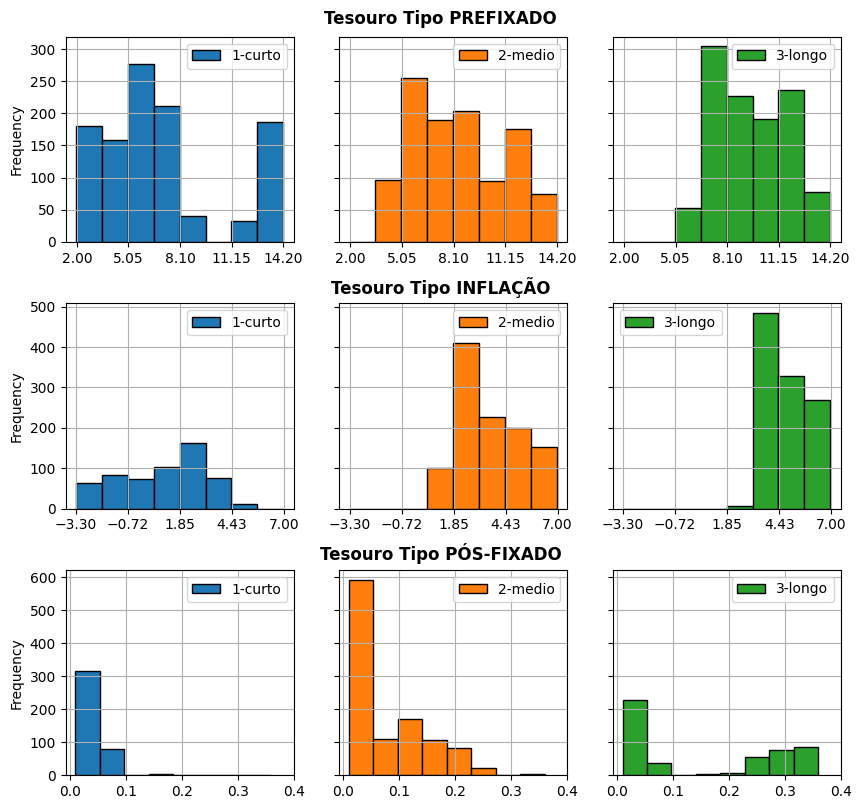

In [ ]:
# exibindo os boxplots dos atributos quantitativos

fig = plt.figure(figsize=(10,8))

qtd_grupos_titulos = len(dados_histograma.keys())
# cria subfiguras para os tipos de rentabilidade
subfigs = fig.subfigures(qtd_grupos_titulos, 1)

ax =[]
cont = 0

# itera sobre os dados para o histogramas
for grupo, dados in dados_histograma.items():

  # armazena os eixos das subfiguras
  ax.append(subfigs[cont].subplots(1,1))
  # pega o valor maximo
  maximo = round(np.max(dados.max()),1)
  # pega o valor minimo
  minimo = round(np.min(dados.min()),1)
  # estabelece um passo dentro do intervalo entre maximo e minimo
  passo = (maximo-minimo)/4
  # plota os histogramas
  dados.plot(kind='hist', subplots=True, layout=(1,3), edgecolor='black',sharex=True, sharey=True, bins=8, grid=True, ax = ax[cont])
  # ajusta os valores no eixo x
  plt.xticks(np.arange(minimo, maximo+passo*0.1, passo))
  # define o titulo superior
  subfigs[cont].suptitle('Tesouro Tipo ' + grupo.upper(), fontweight='bold')
  cont += 1

Na matriz acima vemos como a concentração de títulos com rentabilidade maior vai aumentando conforme o prazo fica mais longo (vencimento mais distante), pois quanto maior o risco, maior o prêmio na rentabilidade.

Também é possível ver que há taxas com valores negativos. Apesar de ser um pouco incomum, é uma situação possível de acontecer.

Na sequencia, vamos organizar os dados para plotar os boxplots das taxas por tipo de rentabilidade e tipo de prazo.

In [ ]:
# cria um dicionario com os dados para plotar os boxplots dos tipos de titulos por tipo de prazo

dados_boxplot = {}
dados_por_prazo = []

# a partir dos dados do histograma
for grupo, dados in dados_histograma.items():
  # para cada tipo de prazo
  for prazo in dados.columns:
    # guarda na lista os dados por tipo de prazo, excluindo os missings
    dados_por_prazo.append(dados[prazo].dropna())
  # guarda a lista no dicionario
  dados_boxplot[grupo] = dados_por_prazo
  # limpa a lista
  dados_por_prazo = []


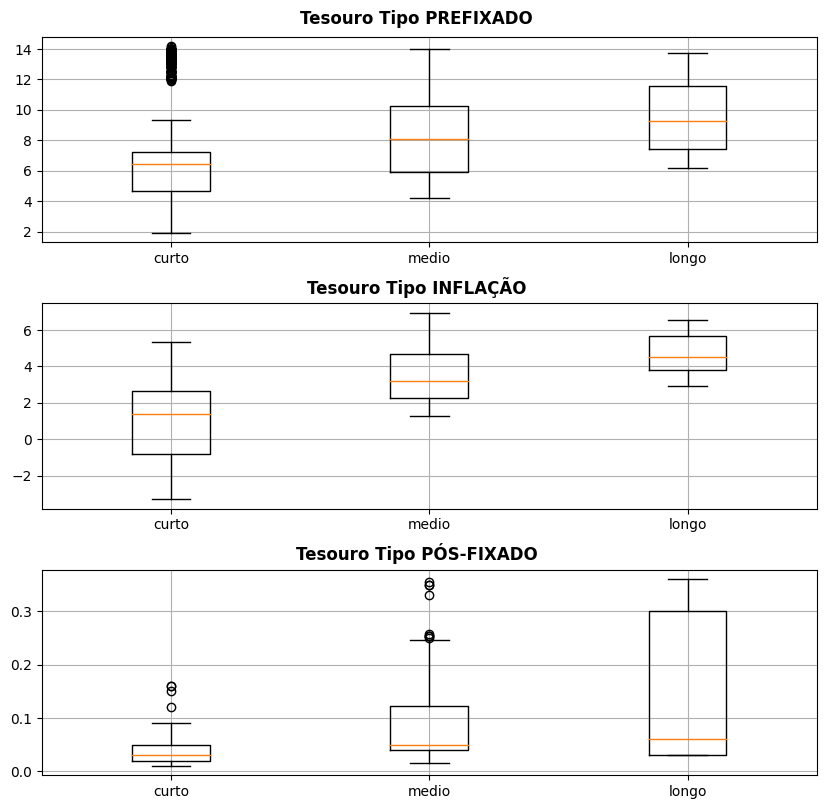

In [ ]:
# exibindo os boxplots dos atributos quantitativos

fig = plt.figure(figsize=(10,8))

qtd_grupos_titulos = len(dados_boxplot.keys())
# cria subfiguras para os tipos de rentabilidade
subfigs = fig.subfigures(qtd_grupos_titulos, 1)

ax =[]
cont = 0

# itera sobre os dados para o boxplots
for grupo, dados in dados_boxplot.items():

  # armazena os eixos das subfiguras
  ax.append(subfigs[cont].subplots(1,1))
  # plota os dados em boxplot
  plt.boxplot(dados)
  # habilita grid
  plt.grid(True)
  # altera os values do eixo x
  plt.xticks([1,2,3], ['curto', 'medio', 'longo'])
  # deifne o texto superior da subfigura da vez
  subfigs[cont].suptitle('Tesouro Tipo ' + grupo.upper(), fontweight='bold')
  cont += 1

Nos boxplots acima, chama a atenção os gráficos de variação (IBOV e CDS) com característica "espremida", exibindo uma grande quantidade de outliers (dados discrepantes da maioria) nos conjuntos de dados. Como já comentado anteriormente, tais dados não podem ser considerados inputs errados pela própria natureza dos datasets.

Nesse caso, não é prudente eliminar tais registros, uma vez que eles provavelmente capturam uma parte do comportamento real dos atributos. O que poderá ser feito posteriormente é testar um tratamento à parte desses outliers junto aos modelos estatísticos para avaliar qual a melhor opção.

#### Visualizações Multimodais

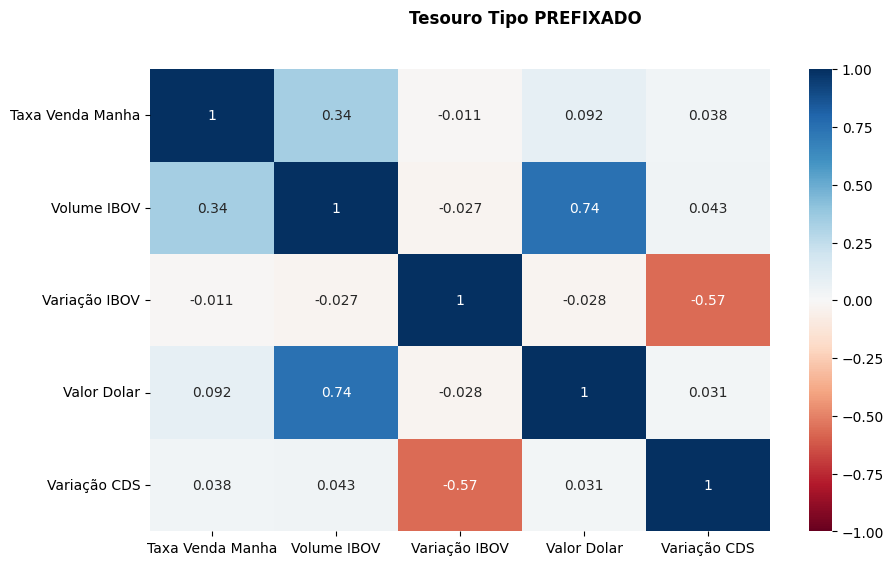

In [ ]:
# matriz de correlação dos atributos para os títulos com rentabilidade do tipo PREFIXADO
fig = plt.figure(figsize = (10,6))
fig.suptitle('Tesouro Tipo PREFIXADO', fontweight='bold')
sns.heatmap(df_analise[(df_analise['Tipo Rentabilidade'] == 'Prefixado')].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Para os títulos com rentabilidade PREFIXADA, é possível observar correlação positiva significativa entre os atributos "Valor Dolar" e "Volume IBOV", bem como correlação negativa significativa entre os atributos "Variação CDS" e "Variação IBOV". Além disso, é possível observar leve correlação positiva entre os atributos "Volume IBOV" e "Taxa Venda Manha".

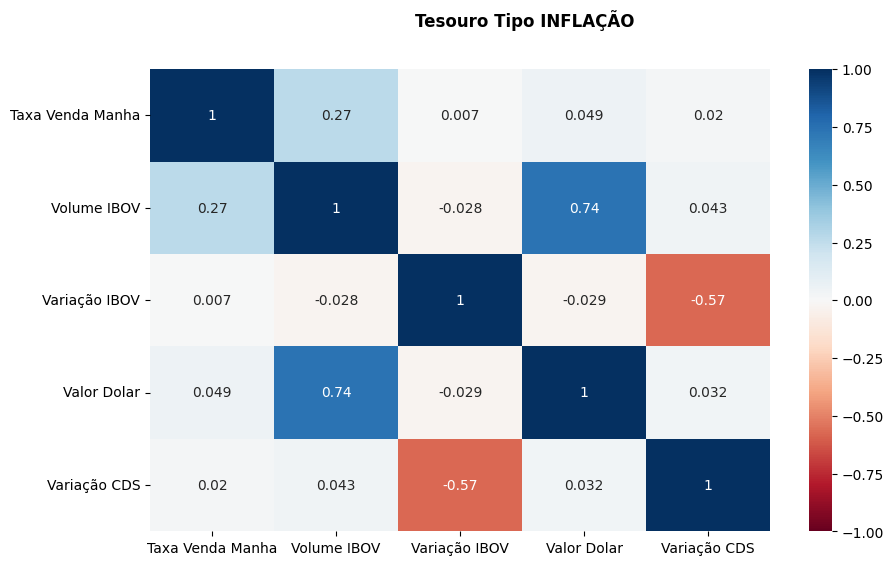

In [ ]:
# matriz de correlação dos atributos para os títulos com rentabilidade do tipo INFLAÇÃO
fig = plt.figure(figsize = (10,6))
fig.suptitle('Tesouro Tipo INFLAÇÃO', fontweight='bold')
sns.heatmap(df_analise[(df_analise['Tipo Rentabilidade'] == 'Inflação')].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Para os títulos com rentabilidade INFLAÇÃO, é possível observar correlação positiva significativa entre os atributos "Valor Dolar" e "Volume IBOV", bem como correlação negativa significativa entre os atributos "Variação CDS" e "Variação IBOV". Além disso, é possível observar leve correlação positiva entre os atributos "Volume IBOV" e "Taxa Venda Manha".

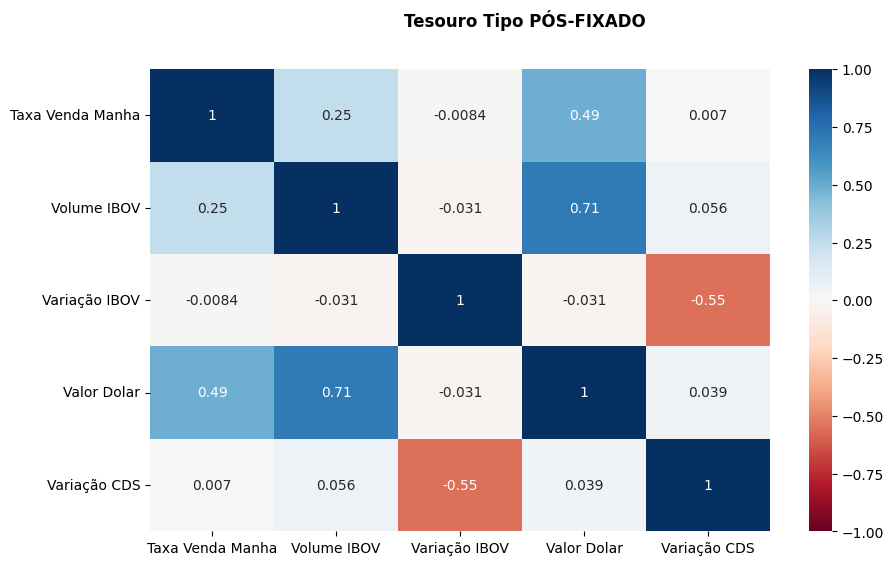

In [ ]:
# matriz de correlação dos atributos para os títulos com rentabilidade do tipo PÓS-FIXADO
fig = plt.figure(figsize = (10,6))
fig.suptitle('Tesouro Tipo PÓS-FIXADO', fontweight='bold')
sns.heatmap(df_analise[(df_analise['Tipo Rentabilidade'] == 'Pós-fixado')].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Para os títulos com rentabilidade PÓS-FIXADA, é possível observar correlação positiva significativa entre os atributos "Valor Dolar" e "Volume IBOV" e entre "Valor Dolar" e " Taxa Venda Manha", bem como correlação negativa significativa entre os atributos "Variação CDS" e "Variação IBOV". Além disso, é possível observar leve correlação positiva entre os atributos "Volume IBOV" e "Taxa Venda Manha".

## 3. Preparação dos Dados

Nesta etapa, realizaremos operações de limpeza, conversão, substituição, transformação de dados, feature selection, e outras que se fizerem necessárias, para preparar os dados para serem submetidos aos modelos de machine learning posteriormente.

### Importação de Pacotes e Módulos

In [ ]:
import matplotlib as mpl
from math import sqrt
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_regression # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.feature_selection import SelectFromModel # Importância de Atributos
from sklearn.linear_model import LinearRegression # Regressão Linear, para a Eliminação Recursiva de Atributos
from sklearn.pipeline import Pipeline # pipeline para encadeamento de tarefas/etapas
from sklearn.tree import DecisionTreeRegressor # arvore de decisao
from sklearn.neighbors import KNeighborsRegressor # KNN
from sklearn.svm import SVR # SVM
from sklearn.ensemble import BaggingRegressor # bagging
from sklearn.ensemble import RandomForestRegressor # random forest
from sklearn.ensemble import ExtraTreesRegressor # extra trees
from sklearn.ensemble import AdaBoostRegressor # ada boost
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting
from sklearn.ensemble import VotingRegressor # voting
from sklearn.metrics import mean_squared_error, mean_absolute_error # metricas
from sklearn.model_selection import KFold # tecnica k-fold
from sklearn.model_selection import cross_val_score # validação cruzada
from sklearn.model_selection import GridSearchCV # grid search


### Carregamento e Preparação

Vamos criamos nosso dataframe de trabalho a partir do datafram da etapa anterior (análise).

In [ ]:
# criando o dataset para a etapa de análise
df_preproc = df_analise

Vamos observar novamente a estrutura do dataset a fim de verificar se há algum ajuste ou simplificação que possa ser feito no mesmo.

In [ ]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28694 entries, 0 to 28693
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tipo Titulo         28694 non-null  object        
 1   Data Vencimento     28694 non-null  datetime64[ns]
 2   Data Base           28694 non-null  datetime64[ns]
 3   Taxa Venda Manha    28694 non-null  float64       
 4   Volume IBOV         28694 non-null  int64         
 5   Variação IBOV       28694 non-null  float64       
 6   Valor Dolar         28694 non-null  float64       
 7   Variação CDS        28694 non-null  float64       
 8   Tipo Prazo          28694 non-null  object        
 9   Tipo Rentabilidade  28694 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 2.4+ MB


Ao analisar as informações acima, verificamos que não existem missings para serem eliminados ou substituídos.

As conversões de dados que eram necessárias já foram feitas na etapa anterior a fim de viabilizar a continuidade da mesma.

Por outro lado, na etapa de análise criamos dois atributos derivados (feature egineering) para categorizar e agrupar registros semelhantes: Tipo Prazo e Tipo Rentabilidade.

Nesta etapa procederemos definindo as transformações de dados necessárias para atributos qualitativos e quantitativos, com o objetivo de realizar ajustes de escala e codificação de dados textuais para preparar os dados para a etapa de treinamento dos modelos.

Vamos começar agrupando os atributos em três tipos de variáveis: numéricas, nominais e ordinais.

In [ ]:
numerical_features = ['Volume IBOV', 'Variação IBOV', 'Valor Dolar', 'Variação CDS']
nominal_features = ['Tipo Titulo', 'Tipo Rentabilidade']
ordinal_features = ['Tipo Prazo']

Vamos agora definir os transformers que serão utilizados para cada tipo de coluna. Cada transformer será enfileirado em um objeto do tipo Pipeline para ser usado posterioremente durante o treino do modelo.

In [ ]:
# OneHotEnconder para variáveis qualitativas nominais
onehot_transformer = Pipeline([('onehot', OneHotEncoder())])
# OrdinalEncoder para variáveis qualitativas ordinais
ordinal_transformer = Pipeline([('ordinal', OrdinalEncoder())])
# MinMaxScaler (normalização) para variáveis quantitativas/numéricas
minmax_transformer = Pipeline([('minmax', MinMaxScaler())])
# StandardScaler (padronização) para variáveis quantitativas/numéricas
std_transformer = Pipeline([('minmax', StandardScaler())])

Para fins de avaliação do impacto das transformações durante a etapa de treino, nossa estratégia será criar três perfis de transformações:

1. noscaler: apenas transformações de atributos qualitativos, preservando as escalas originais dos atributos numéricos;
2. minmax: normalização dos atributos numéricos, além das transformações de atributos qualitativos;
3. std: padronização dos atributos numéricos, além das transformações de atributos qualitativos;

Utilizaremos a classe ColumnTransformer para associar cada transformer aos seus respectivos atributos-alvo.

In [ ]:
# criando dataset sem a variável target para a criação dos mapas de atributos
df_preproc_no_target = df_preproc.drop('Taxa Venda Manha', axis=1)

# criando mapa/dicionário dos nomes dos atributos por tipo
numerical_features_map = dict([(nome, df_preproc_no_target.columns.get_loc(nome)) for nome in numerical_features])
nominal_features_map = dict([(nome, df_preproc_no_target.columns.get_loc(nome)) for nome in nominal_features])
ordinal_features_map = dict([(nome, df_preproc_no_target.columns.get_loc(nome)) for nome in ordinal_features])

# extraindo os índices das colunas dos respectivos atributos por tipo
numerical_index = list(numerical_features_map.values())
nominal_index = list(nominal_features_map.values())
ordinal_index = list(ordinal_features_map.values())

# criando o perfil de transformação 'noscaler'
noscaler_preproc = ColumnTransformer(
    [
        ('onehot', onehot_transformer, nominal_index),
        ('ordinal', ordinal_transformer, ordinal_index),
    ])

# criando o perfil de transformação 'minmax'
minmax_preproc = ColumnTransformer(
    [
        ('onehot', onehot_transformer, nominal_index),
        ('ordinal', ordinal_transformer, ordinal_index),
        ('minmax', minmax_transformer, numerical_index)
    ])

# criando o perfil de transformação 'std'
std_preproc = ColumnTransformer(
    [
        ('onehot', onehot_transformer, nominal_index),
        ('ordinal', ordinal_transformer, ordinal_index),
        ('std', std_transformer, numerical_index)
    ])

Por fim, vamos agrupar os três perfis de transformações criados em um dicionário para facilitar o processamento iterativo das operações com os dados.

In [ ]:
# agrupando os perfis de transformação em um dicionário
transformers = {
    'noscaler': noscaler_preproc,
    'minmax': minmax_preproc,
    'std': std_preproc
}

## 4. Modelagem

### Funções

In [ ]:
# processa sequência de estimadores (modelos) de machine learning ou pipelines em uma lista de tuplas contendo o 'nome' e o 'modelo/pipeline' correspondente.
# realiza a validação cruzada para cada modelo/pipeline na sequência, imprime os resultados e retorna os nomes dos modelos e os resultados das validações cruzadas.
def run_cross_validation(pipelines, X, y):
    results = []
    for name, model in pipelines.items():
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append((name, cv_results))
        print('='*7, name, '='*7)
        #msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
        print('RMSE: %.3f' % -cv_results.mean())
        print('StdDev: %.3f' % cv_results.std())
        #print(msg)

    return results

In [ ]:
# cria um boxplot dos resultados da validação cruzada de diferentes modelos/pipelines
def box_plot_results(results, title):

    names = []
    cv_results = []
    fig = plt.figure(figsize=(25,6))
    fig.suptitle(title)

    for name, cv_res in results:
      names.append(name)
      cv_results.append(cv_res)

    ax = fig.add_subplot(111)
    plt.boxplot(cv_results)
    ax.set_xticklabels(names, rotation=90)
    plt.grid(True)
    plt.show()

In [ ]:
#calcula a média dos resultados para cada preditor e retorna o nome do preditor com o menor valor médio.
def find_best_result(results):

  mean_results = []
  names = []

  for name, cv_results in results:

    # Calcula a média dos resultados para cada preditor
    array_mean = np.mean([np.abs(r) for r in cv_results])
    mean_results.append(array_mean)
    names.append(name)

  # Obtém o nome e o valor médio do preditor com melhor desempenho
  index_best_predictor = np.argmin(mean_results)
  best_predictor_name = names[index_best_predictor]
  best_rmse = mean_results[index_best_predictor]

  # # Imprime o resultado
  print("Melhor preditor:", best_predictor_name)
  print("RMSE médio:", best_rmse)

  best_result = [t for i, t in enumerate(results) if t[0] == best_predictor_name][0]

  return best_result

In [ ]:
#recebe dicionários de transformers e de estimators e gera todas as combinações de tuplas de 'pipeline_names' e 'pipelines'
def create_model_pipelines(transformers, estimators):

    # pipelines = []
    pipelines = {}

    for name, estimator in estimators.items():
      #for fs_name, selector in feat_selectors.items():
        for transform_name, transformer in transformers.items():

          pipeline_name = f"{name}-{transform_name}"

          if transformer is None:
            pipeline = Pipeline([(name, estimator)])
          else:
            pipeline = Pipeline([(transform_name, transformer), (name, estimator)])

          pipelines.update({pipeline_name: pipeline})

    return pipelines

In [ ]:
# adiciona o step de feature selection no pipeline
def add_feature_selection_pipeline(model_pipeline, model_name, selectors):

  feat_sel_pipelines = {}

  for name, selector in selectors.items():
    pipeline_name = f'{model_name}-{name}'
    pipeline_steps = [model_pipeline.steps[0], (name, selector)] + model_pipeline.steps[1:-1]
    pipeline_steps.append((deepcopy(model_pipeline.steps[-1])))
    feat_sel_pipelines.update({pipeline_name: Pipeline(pipeline_steps)})

  return feat_sel_pipelines

In [ ]:
# treina o pipeline com os datasets passados por parâmetro
def fit_pipelines(pipelines, X, y):
  for name, pipeline in pipelines.items():
    pipeline.fit(X, y)

In [ ]:
# imprime o MSE e retorna um dicionario com as predicoes dos modelos passados por parâmetro
def run_predictions(predictors, X, y):

    predictions = {}

    for name, predictor in predictors.items():
      score = predictor.score(X, y)
      print('Score {}: {:.3f}'.format(name, score))
      predictions.update({name: (score, predictor.predict(X))})

    return predictions

In [ ]:
# plota um comparativo do dados originais e das predicoes
def plot_predictions(predictions,y ):

  cores = get_colors_pallet()
  color_cont = 0

  fig = plt.figure(figsize=(15,10))

  true_max = []
  pred_max = []
  true_min = []
  pred_min = []

  for name, prediction in predictions.items():
    y_true = y_test.to_numpy()
    y_pred = prediction[1]

    true_max.append(np.max(y_true))
    pred_max.append(np.max(y_pred))
    true_min.append(np.min(y_true))
    pred_min.append(np.min(y_pred))

    # if name == 'BaggingRegressor-minmax-skb':
    plt.scatter(y_pred, y_true, color = cores[color_cont], alpha = 0.4, label = name + ': ' + str(round(prediction[0],3)))
    color_cont += 1

  plt.xlabel('Variável Prevista')
  plt.ylabel('Variável Real')
  max = np.round(np.max(true_max + pred_max))
  min = np.round(np.min(true_min + pred_min))
  xt = list(range(int(min),int(max)+1))
  yt = list(range(int(min),int(max)+1))
  plt.xticks(xt, xt)
  plt.yticks(yt, xt)
  plt.legend()
  plt.title('Comparação entre Valores Reais e Predições')
  color_cont += 1


In [ ]:
# função auxiliar da função 'plot_predictions' para criar paleta de cores para a plotagem
def get_colors_pallet():
  # a paleta viridis é robusta para pessoas com daltonismo
  vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

  # converte o mapa de cores em um vetor, para uso de cores individuais
  coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
  # display(coresViridis)
  return coresViridis

In [ ]:
# encontra a melhor predição dentre a coleção passado por parâmetro
def find_best_prediction(predictions):
    best_prediction = None

    for name, prediction in predictions.items():
      if best_prediction is None:
        best_prediction = prediction
        best_prediction_name = name
      else:
        # print(prediction[0], ' > ', best_prediction[0], '?')
        if prediction[0] > best_prediction[0]:
          # print('yes', '-', 'best prediction is ', prediction[0])
          best_prediction = prediction
          best_prediction_name = name

    return (best_prediction_name, best_prediction)

Nesta etapa faremos a separação dos conjuntos de treino e teste; escolha e parametrização dos modelos que serão treinados; validação cruzada e avaliação dos resultado do treinamento; processo de feature selection; e otimização de hiperparâmetros.

### Amostragem do Dataset: Holdout

Nesta etapa, vamos realizar o processo de holdout, separando o dataset em conjuntos de treino e de teste.

Vamos começar selecionando as características e a variável alvo (target) do modelo.

In [ ]:
# variável alvo do modelo
y = df_preproc['Taxa Venda Manha']
# variáveis características do modelo
X = df_preproc.drop('Taxa Venda Manha', axis=1)

Aplicando holdout para fazer a amostragem treino-teste do dataset.

In [ ]:
test_size = 0.10 # tamanho do conjunto de teste
randon_state = 7 # semente aleatória
np.random.seed(randon_state) # definindo uma semente global

# separando os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=randon_state)

Essa separação é necessária antes dos processos de transformação dos dados para evitar vazamento de dados (*data leakage*).

### Definição dos Modelos

Criamos um dicionário com vários modelos diferentes para treinamento com a finalidade de selecionar o modelo com melhor desempenho para o problema proposto.

In [ ]:
# paramêtros para os ensembles
base_regressor = DecisionTreeRegressor()
num_trees = 100

# modelos para o ensemble Voting Regressor
voting_regressor_bases = []
voting_regressor_bases.append(('LR', LinearRegression()))
voting_regressor_bases.append(('cart', DecisionTreeRegressor()))
voting_regressor_bases.append(('knn', KNeighborsRegressor()))

# Dicionário de Modelos para Regressão Linear
estimators = {
  'LinearRegression': LinearRegression(),
  'KNeighborsRegressor': KNeighborsRegressor(),
  'DecisionTreeRegressor': DecisionTreeRegressor(),
  'BaggingRegressor': BaggingRegressor(base_estimator=base_regressor, n_estimators=num_trees),
  'RandomForestRegressor': RandomForestRegressor(n_estimators=num_trees),
  'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=num_trees),
  'AdaBoostRegressor': AdaBoostRegressor(n_estimators=num_trees),
  'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=num_trees),
  'VotingRegressor': VotingRegressor(estimators=voting_regressor_bases)
}

### Avaliação dos Modelos com Validação Cruzada

Para evitar overfitting, realizaremos o treinamento dos modelos utilizando a técnica de validação cruzada com K-Fold de 10 partições. A métrica escolhida será o RMSE, ou raiz do erro médio quadrático. Ao final do processo de validação cruzada calcularemos a média dos valores de RMSE de cada fold, que será a métrica para avaliação de cada modelo.

In [ ]:
# Parâmetros e partições da validação cruzada
scoring = 'neg_root_mean_squared_error'
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=randon_state)

In [ ]:
# criando os pipelines dos modelos com os transformers já definidos
pipelines = create_model_pipelines(transformers, estimators)

In [ ]:
# rodar a validação cruzada com o conjunto de treino
results = run_cross_validation(pipelines, X_train, y_train)

======= LinearRegression-noscaler =======
RMSE: 1.986
StdDev: 0.033
======= LinearRegression-minmax =======
RMSE: 1.845
StdDev: 0.035
======= LinearRegression-std =======
RMSE: 1.845
StdDev: 0.035
======= KNeighborsRegressor-noscaler =======
RMSE: 2.094
StdDev: 0.084
======= KNeighborsRegressor-minmax =======
RMSE: 1.417
StdDev: 0.046
======= KNeighborsRegressor-std =======
RMSE: 1.423
StdDev: 0.051
======= DecisionTreeRegressor-noscaler =======
RMSE: 1.951
StdDev: 0.031
======= DecisionTreeRegressor-minmax =======
RMSE: 0.887
StdDev: 0.035
======= DecisionTreeRegressor-std =======
RMSE: 0.874
StdDev: 0.029
======= BaggingRegressor-noscaler =======
RMSE: 1.951
StdDev: 0.031
======= BaggingRegressor-minmax =======
RMSE: 0.726
StdDev: 0.039
======= BaggingRegressor-std =======
RMSE: 0.727
StdDev: 0.043
======= RandomForestRegressor-noscaler =======
RMSE: 1.951
StdDev: 0.031
======= RandomForestRegressor-minmax =======
RMSE: 0.728
StdDev: 0.040
======= RandomForestRegressor-std =======
RM

Uma vez os resultados calculados, executaremos a função para encontrar o melhor resultado do conjunto.

In [ ]:
best_result = find_best_result(results)

Melhor preditor: BaggingRegressor-minmax
RMSE médio: 0.7260850519272493


Agora plotaremos o gráfico boxplot  de todos os modelos para avaliarmos visualmente o desempenho de cada um.

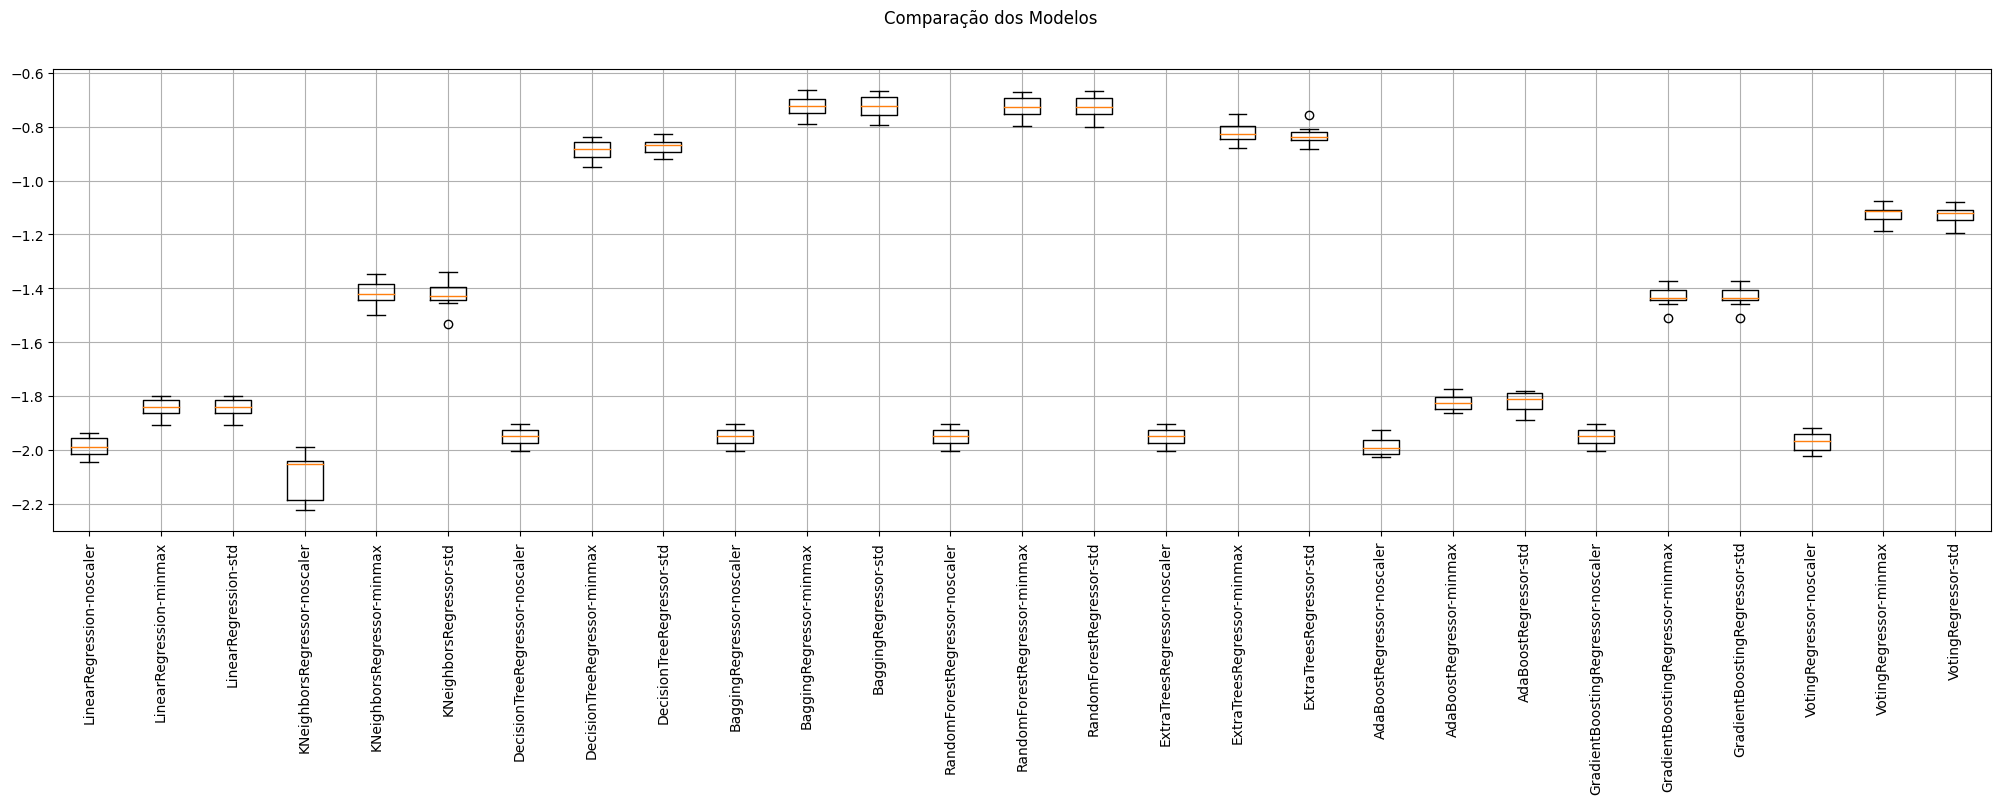

In [ ]:
box_plot_results(results, 'Comparação dos Modelos')

### Feature Selection

Com o modelo vencedor, realizaremos testes com a técnica de feature selection na tentativa de aumentar o desempenho do modelo.

Avaliaremos quatro cenários para o modelo vencedor:
1. nofs: sem feature selection
2. skb: feature selection com o algoritmo SelectKBest
3. rfe: feature selection com o algoritmo RFE
4. sfm: feature selection com o algoritmo SelectFromModel

In [ ]:
# parametros para feature selection
max_features = 5
base_regressor = DecisionTreeRegressor()
best_pipeline_name = best_result[0]
best_pipeline = pipelines[best_pipeline_name]

# cenários de feature selection
selectors = {
    'nofs': None,
    'skb': SelectKBest(score_func=f_regression, k=max_features),
    'rfe': RFE(base_regressor, n_features_to_select=max_features),
    'sfm': SelectFromModel(base_regressor, threshold=-np.inf, max_features=max_features)
}

# criando os pipelines do modelo vencedor com feature selection
feat_sel_pipelines = add_feature_selection_pipeline(best_pipeline, best_pipeline_name, selectors)

In [ ]:
# treinando os pipelines de cada cenário
fit_pipelines(feat_sel_pipelines, X_train, y_train)

Agora avaliaremos o desempenho de cada cenário utilizando a métrica o Coeficiente de Determinação (R²), que expressa o percentual da variância dos dados que é explicado pelo modelo.

In [ ]:
predictions = run_predictions(feat_sel_pipelines, X_test, y_test)

Score BaggingRegressor-minmax-nofs: 0.955
Score BaggingRegressor-minmax-skb: 0.646
Score BaggingRegressor-minmax-rfe: 0.900
Score BaggingRegressor-minmax-sfm: 0.961


O cenário de Feature Selection com SelectFromModel conseguiu melhorar sensivelmente o desempenho do modelo, sendo o cenário de melhor desempenho. Abaixo o gráfico scatterplot das variáveis reais vs variáveis preditas pelos modelos.

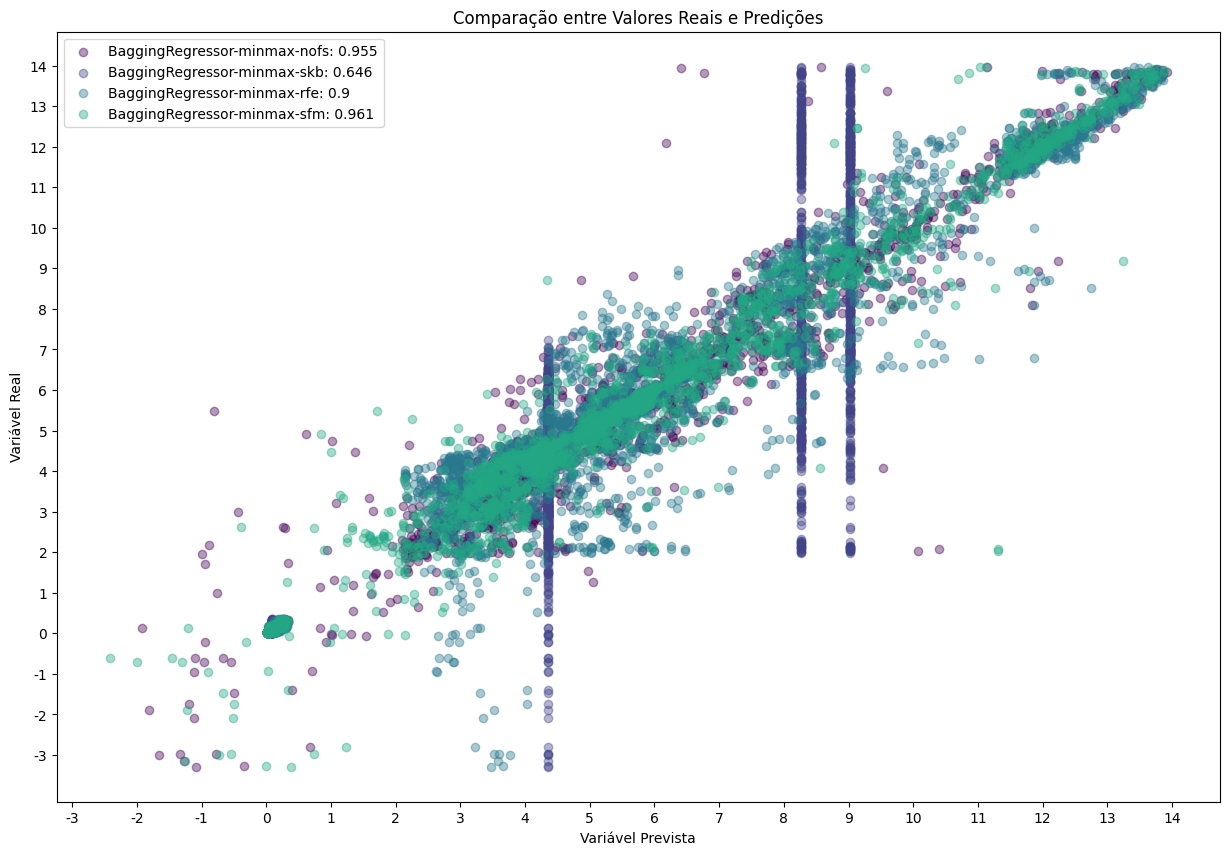

In [ ]:
plot_predictions(predictions, y_test)

Agora selecionaremos o pipeline e o modelo com melhor desempenho dos cenários avaliados.

In [ ]:
best_prediction = find_best_prediction(predictions)
best_pipeline_name = best_prediction[0]
best_pipeline = feat_sel_pipelines[best_pipeline_name]
best_model = (best_pipeline_name, best_pipeline)

### Otimização de Hiperparâmetros

Nessa última subetapa, faremos a otimização de hiperparâmetros do modelo vencedor, variando os principais parâmetros com a classe GridSearchCV.

In [ ]:
# parametros para Bagging Regressor
param_grid = {
    'BaggingRegressor__n_estimators': [10,15,20,25,30],
    'BaggingRegressor__max_samples': [0.5, 0.75, 1.0],
    'BaggingRegressor__max_features': [4, 5, 6, 7]
}

grid_search = GridSearchCV(best_model[1], param_grid, cv=num_particoes, scoring=scoring)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

best_model = grid_search.best_estimator_
score = best_model.score(X_test, y_test)
print("Score:", score)

Melhores hiperparâmetros: {'BaggingRegressor__max_features': 5, 'BaggingRegressor__max_samples': 1.0, 'BaggingRegressor__n_estimators': 25}
Score: 0.9622643288376097


### Inferência

Agora vamos treinar o modelo vencedor com todo o dataset para deixá-lo pronto para inferência com valores não-vistos.

In [ ]:
best_model.fit(X, y)

Pipeline(steps=[('minmax',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  [0, 8]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [7]),
                                                 ('minmax',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  [3, 4, 5, 6])])),
                ('sfm',
                 SelectFromModel(estimator=DecisionTreeRegressor(),
                                 max_features=5, threshold=-inf)),
                ('BaggingRegressor',
                 BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                  max_features=5, n_estimators=25))])

# PROBLEMA 2: SIMILARIDADE DE SENTENÇAS COM DEEP LEARNING

## 1. Definição do Problema

Uma das tarefas possíveis de serem realizadas na área de Processamento de Linguagem Natural é a análise de similaridade semântica de palavras/sentenças. Neste trabalho, trabalharemos com esta problemática, buscando demonstrar o uso de learning com a biblioteca Doc2Vec, para treinar um modelo capaz de reconhecer a similaridade entre sentenças de textos em português.

## 2. Coleta e Análise dos Dados

Inicialmente, para coletar os dados precisaremos baixar a biblioteca 'datasets', na qual teremos acesso de forma fácil e automatizada a inúmeras opções de datasets do site HuggingFace para download, para uso no projeto.

In [39]:
!pip install datasets

Aqui importaremos as bibliotecas que serão utilizadas no projeto.

In [40]:
import numpy as np
import pandas as pd
import re
from datasets import load_dataset

O dataset que trabalharemos é o dataset ASSIN (Avaliação de Similaridade Semântica e INferência textual), um corpus com 10 mil pares de sentenças em português brasileiro e português europeu, extraídos de artigos de notícias. Cada par acompanha um score de similaridade semântica e um rótulo de classificação dos textos.

In [41]:
dataset = load_dataset("assin")

O dataset baixado é um dicionário com três subdatasets: train, test e validation.

In [42]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence_pair_id', 'premise', 'hypothesis', 'relatedness_score', 'entailment_judgment'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['sentence_pair_id', 'premise', 'hypothesis', 'relatedness_score', 'entailment_judgment'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['sentence_pair_id', 'premise', 'hypothesis', 'relatedness_score', 'entailment_judgment'],
        num_rows: 1000
    })
})

Vamos visualizar o dataset de treino para avaliar sua estrutura e seus atributos.

In [43]:
pd.DataFrame(dataset['train'])

,sentence_pair_id,premise,hypothesis,relatedness_score,entailment_judgment
0,1,"A gente faz o aporte financeiro, é como se a empresa fosse parceira do Monte Cristo.",Fernando Moraes afirma que não tem vínculo com o Monte Cristo além da parceira.,2.00,0
1,2,"Em 2013, a história de como Walt Disney convenceu P.L.",P.L.Travers era completamente contra a adaptação de Walt Disney.,2.25,0
2,3,"David Silva bateu escanteio, Kompany escalou as costas de Chiellini e o zagueiro marcou contra.","David Silva cobrou escanteio, o zagueiro se apoiou em Chiellini e cabeceou.",3.75,0
3,4,"Para os ambientalistas, as metas anunciadas pela presidente Dilma foram um avanço.","Dilma aproveitou seu discurso ontem, na Conferência de Desenvolvimento Sustentável pós-2015 para anunciar desde já essas metas.",2.75,0
4,5,"De acordo com a PM, por volta das 10h30 havia 2 mil militantes no local.",O protesto encerrou por volta de 12h15 (horário local).,2.00,0
...,...,...,...,...,...
4995,2496,Petra Laszlo foi despedida e recebeu dezenas de ameaças de morte.,"Depois disso, Petra Laszlo veio pedir desculpas.",2.75,0
4996,2497,"Pedro Soares volta a liderar, no distrito de Braga, a candidatura do Bloco de Esquerda às eleições legislativas.",Pedro Soares entende que o distrito de Braga sofreu mais com a crise do que o resto do país.,2.50,0
4997,2498,"O atropelamento rodoviário é hoje ""a maior causa de morte"" do lince ibérico.",O atropelamento rodoviário é atualmente a principal causa de morte do lince ibérico.,5.00,2
4998,2499,"São nove os investigados da Operação Marquês, incluindo Vara e Sócrates.","Armando Vara é suspeito na Operação Marquês, a mesma que envolve José Sócrates.",3.75,1


Como só vamos precisar das sentenças textuais, vamos criar referencias para cada um dos datasets, extraindo apenas as setenças dos datasets. Vamos então concatenar o atributo 'hypothesis' abaixo do atributo 'premises' par aproveitar o texto de ambos.

In [44]:
ds_premise = list(dataset['train']['premise'])
ds_hypothesis = list(dataset['train']['hypothesis'])
ds_total = ds_premise
ds_total.extend(ds_hypothesis)
train_dataset = pd.DataFrame(ds_total)
# validation_dataset = pd.DataFrame(dataset['validation']['premise']).append(pd.DataFrame(dataset['validation']['hypothesis']), ignore_index=True)
# test_dataset = pd.DataFrame(dataset['test']['premise']).append(pd.DataFrame(dataset['test']['hypothesis']), ignore_index=True)

Vamos conferir se há algum nulo no dataset para ser tratado.

In [45]:
train_dataset.isna().any().sum()

0

O dataset não possui valores nulos, portanto, seguiremos para a etapa de Pré-Processamento.

## 3. Pré-Processamento

Nessa etapa realizaremos a limpeza de caracteres especiais, conversão de letras em minúsculas, tokenização, remoção de stop-words e stemming dos dados textuais, a fim de prepará-los para a etapa de treinamento do modelo.

Vamos começar baixando e importando pacotes e bibliotecas utilizados durante a etapa.

In [46]:
# pacote necessário para substituição de caracteres especiais
!pip install unidecode
# pacote para lematização
!python -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [47]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

### Funções

Aqui reuniremos as funções que serão utilizadas durante essa etapa do projeto.

In [48]:
def remover_caracteres_especiais(texto):
    # Remove caracteres especiais e substitui acentuação e cedilhas pelas letras correspondentes
    texto_limpo = unidecode(re.sub(r'[^\w\s]', '', texto))

    return texto_limpo


In [49]:
def remove_urls(text):
    # Expressão regular para detectar URLs
    url_pattern = re.compile(r'http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

    # Substitui as URLs encontradas por uma string vazia
    cleanned_text = re.sub(url_pattern, 'LINK', text)

    return cleanned_text

In [50]:
def remove_duplicate_spaces(text):
    # Substitui espaços duplicados por um único espaço, preservando as quebras de linha
    new_texto = re.sub(r' +', ' ', text)

    return new_texto


In [51]:
def remove_emoticons(text):
  # Substitui espaços duplicados por um único espaço, preservando as quebras de linha
    new_text = re.sub(r' [:xX-][D\(\)\/]', '', text)

    return new_text

### Limpeza

Existem várias informações de pouco valor para o aprendizado de máquina no texto humano. Símbolos, caracteres especiais, espaços duplicados, pontuação, etc, podem ser considerados apenas ruídos para o modelo a ser treinado. Por isso, nessa etapa removeremos esse tipo de informação a fim de reduzir a quantidade de ruído presente no dataset, aumentando sua qualidade para a etapa de treinamento.

Vamos iniciar extraindo o texto (string) do dataset.

In [53]:
# parâmetro para aumentar a quantidade de caracteres exibidos pela função to_string
pd.set_option("display.max_colwidth", 2000)
text = train_dataset.iloc[:,0].to_string(index=False)

Vamos visualizar os primeiros quinhentos caraceteres do dataset antes de iniciar o seu pré-processamento.

In [54]:
print('tamanho:', len(text))
print(text[:500])

tamanho: 1889999
                                                                                                        A gente faz o aporte financeiro, é como se a empresa fosse parceira do Monte Cristo.
                                                                                                                                      Em 2013, a história de como Walt Disney convenceu P.L.
                                                                                             David Silva bateu escanteio, 


Vamos agora remover os espaços duplicados do texto, preservando as quebras de linha para separar as sentenças.

In [55]:
# removendo espaços duplicados
cleanned_text = remove_duplicate_spaces(text)
# visualizando o resultado
print('tamanho:', len(cleanned_text))
print(cleanned_text[:500])

tamanho: 843805
 A gente faz o aporte financeiro, é como se a empresa fosse parceira do Monte Cristo.
 Em 2013, a história de como Walt Disney convenceu P.L.
 David Silva bateu escanteio, Kompany escalou as costas de Chiellini e o zagueiro marcou contra.
 Para os ambientalistas, as metas anunciadas pela presidente Dilma foram um avanço.
 De acordo com a PM, por volta das 10h30 havia 2 mil militantes no local.
 A programação entra em cartaz nesta quinta-feira (24) e segue até a próxima quarta-feira (30).
 Claudi


Vamos agora remover as urls presentes no texto, caso existam.

In [56]:
# removendo urls
cleanned_text = remove_urls(cleanned_text)
# visualizando o resultado
print('tamanho:', len(cleanned_text))
print(cleanned_text[:500])

tamanho: 843805
 A gente faz o aporte financeiro, é como se a empresa fosse parceira do Monte Cristo.
 Em 2013, a história de como Walt Disney convenceu P.L.
 David Silva bateu escanteio, Kompany escalou as costas de Chiellini e o zagueiro marcou contra.
 Para os ambientalistas, as metas anunciadas pela presidente Dilma foram um avanço.
 De acordo com a PM, por volta das 10h30 havia 2 mil militantes no local.
 A programação entra em cartaz nesta quinta-feira (24) e segue até a próxima quarta-feira (30).
 Claudi


Vamos agora remover emoticons do texto, caso existam.

In [57]:
# removendo emoticons
cleanned_text = remove_emoticons(cleanned_text)
# visualizando o resultado
print('tamanho:', len(cleanned_text))
print(cleanned_text[:500])

tamanho: 843805
 A gente faz o aporte financeiro, é como se a empresa fosse parceira do Monte Cristo.
 Em 2013, a história de como Walt Disney convenceu P.L.
 David Silva bateu escanteio, Kompany escalou as costas de Chiellini e o zagueiro marcou contra.
 Para os ambientalistas, as metas anunciadas pela presidente Dilma foram um avanço.
 De acordo com a PM, por volta das 10h30 havia 2 mil militantes no local.
 A programação entra em cartaz nesta quinta-feira (24) e segue até a próxima quarta-feira (30).
 Claudi


Vamos agora remover todos os caracteres especiais e substituir acentuações gráficas e suas variantes pelos seus correspondentes não acentuados.

In [58]:
# removendo caracteres especiais
cleanned_text = remover_caracteres_especiais(cleanned_text)
#visualizando o resultado
print('tamanho:', len(cleanned_text))
print(cleanned_text[:500])

tamanho: 821975
 A gente faz o aporte financeiro e como se a empresa fosse parceira do Monte Cristo
 Em 2013 a historia de como Walt Disney convenceu PL
 David Silva bateu escanteio Kompany escalou as costas de Chiellini e o zagueiro marcou contra
 Para os ambientalistas as metas anunciadas pela presidente Dilma foram um avanco
 De acordo com a PM por volta das 10h30 havia 2 mil militantes no local
 A programacao entra em cartaz nesta quintafeira 24 e segue ate a proxima quartafeira 30
 Claudia Leitte porem ain


Ao final do processo de limpeza, vamos transformar o texto em um array de sentenças com letras minúsculas, separadas pelo caractere de quebra de linha.

In [59]:
# convertendo o texto em array de sentenças com letras minúsculas
cleanned_sentences = np.array(cleanned_text.lower().splitlines())
# visualizando o resultado
print('tamanho:', len(cleanned_sentences))
print(cleanned_sentences[:50])

tamanho: 10000
[' a gente faz o aporte financeiro e como se a empresa fosse parceira do monte cristo'
 ' em 2013 a historia de como walt disney convenceu pl'
 ' david silva bateu escanteio kompany escalou as costas de chiellini e o zagueiro marcou contra'
 ' para os ambientalistas as metas anunciadas pela presidente dilma foram um avanco'
 ' de acordo com a pm por volta das 10h30 havia 2 mil militantes no local'
 ' a programacao entra em cartaz nesta quintafeira 24 e segue ate a proxima quartafeira 30'
 ' claudia leitte porem ainda nao escolheu o ajudante'
 ' as informacoes sao da superintendencia de transito e transporte de salvador transalvador'
 ' os sintomas da zika virus dengue e febre chikungunyia sao parecidos'
 ' tenho orgulho de ter feito parte da construcao do psol'
 ' o caminho de ajuste via aumento de carga tributaria e muito mal visto pela sociedade e pelo congresso'
 ' o tecnico rene simoes deixou o comando tecnico do figueirense apos a derrota na noite desta ultima quart

### Tokenização

Um token é uma unidade/sequência mínima de caracteres de um texto ou palavra. O processo de tokenização divide as palavras e sentenças do texto em unidades mínimas para facilitar o processo de aprendizado de seu significado pelo modelo.

In [60]:
# punkt é o tokenizador de sentenças pré-treinado do pacote NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Criando uma lista de sentenças tokenizadas.

In [61]:
# tokenizando a lista de sentenças
tokenized_sentences = [word_tokenize(sentence, language='portuguese') for sentence in cleanned_sentences]

In [62]:
# visualizando o resultado
print('tamanho: ', len(tokenized_sentences))
print(tokenized_sentences[:5])

tamanho:  10000
[['a', 'gente', 'faz', 'o', 'aporte', 'financeiro', 'e', 'como', 'se', 'a', 'empresa', 'fosse', 'parceira', 'do', 'monte', 'cristo'], ['em', '2013', 'a', 'historia', 'de', 'como', 'walt', 'disney', 'convenceu', 'pl'], ['david', 'silva', 'bateu', 'escanteio', 'kompany', 'escalou', 'as', 'costas', 'de', 'chiellini', 'e', 'o', 'zagueiro', 'marcou', 'contra'], ['para', 'os', 'ambientalistas', 'as', 'metas', 'anunciadas', 'pela', 'presidente', 'dilma', 'foram', 'um', 'avanco'], ['de', 'acordo', 'com', 'a', 'pm', 'por', 'volta', 'das', '10h30', 'havia', '2', 'mil', 'militantes', 'no', 'local']]


### Lematização

In [63]:
nlp = spacy.load('pt_core_news_sm')

In [64]:
lemmatized_sentences = [[word.lemma_ for word in nlp(str(' '.join(sentence)))] for sentence in tokenized_sentences]

In [65]:
# visualizando o resultado
print('tamanho: ', len(lemmatized_sentences))
print(lemmatized_sentences[:5])

tamanho:  10000
[['o', 'gente', 'fazer', 'o', 'aporte', 'financeiro', 'e', 'como', 'se', 'o', 'empresa', 'ser', 'parceiro', 'de o', 'Monte', 'cristo'], ['em', '2013', 'o', 'historia', 'de', 'como', 'walt', 'disney', 'convencer', 'pl'], ['david', 'Silva', 'bater', 'escanteio', 'kompany', 'escalar', 'o', 'costa', 'de', 'chiellini', 'e', 'o', 'zagueiro', 'marcar', 'contra'], ['para', 'o', 'ambientalista', 'o', 'meta', 'anunciar', 'por o', 'presidente', 'dilmar', 'ser', 'um', 'avanco'], ['de', 'acordo', 'com', 'o', 'pm', 'por', 'volta', 'de o', '10h30', 'haver', '2', 'mil', 'militante', 'em o', 'local']]


### Remoção de stopwords

Além de caracteres que são interpretados como ruído pelo modelo, também existem algumas palavras que não contruíbuem com muita informação para o processo de aprendizado e são encaradas como ruído, conhecidas como *stop-words*, que precisam ser removidas para aumentar a qualidade do dataset.

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Selecionado o subconjunto de stopword em português.

In [67]:
stop_words = stopwords.words('portuguese')

Filtrando stopwords e criando novo dataset.

In [68]:
filtered_review = []
for sentence in lemmatized_sentences:
  filtered_review.append([word for word in sentence if word not in stop_words])

In [69]:
# visualizando o resultado
print('tamanho: ', len(filtered_review))
print(filtered_review[:5])

tamanho:  10000
[['gente', 'fazer', 'aporte', 'financeiro', 'empresa', 'parceiro', 'de o', 'Monte', 'cristo'], ['2013', 'historia', 'walt', 'disney', 'convencer', 'pl'], ['david', 'Silva', 'bater', 'escanteio', 'kompany', 'escalar', 'costa', 'chiellini', 'zagueiro', 'marcar', 'contra'], ['ambientalista', 'meta', 'anunciar', 'por o', 'presidente', 'dilmar', 'avanco'], ['acordo', 'pm', 'volta', 'de o', '10h30', '2', 'mil', 'militante', 'em o', 'local']]


### Stemming

O processo de stemming, ou lematização, consiste na redução de palavras ao seu radical ou palavra-raiz, removendo inflexões, afixos, desinências. etc, que podem dificultar o entendimento do sentido básico da palavra.

In [70]:
# baixando algoritmo de stemming para português
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [71]:
# inicializando o stemmer
stemmer = nltk.stem.RSLPStemmer()

Vamos criar um novo dataset com as palavras lematizadas.

In [72]:
stemmed_review = []
for sentence in filtered_review:
  stemmed_review.append([stemmer.stem(word) for word in sentence])

In [73]:
# visualizando o resultado
print('tamanho: ', len(stemmed_review))
print(stemmed_review[:5])

tamanho:  10000
[['gent', 'faz', 'aport', 'financ', 'empr', 'parc', 'de ', 'mont', 'crist'], ['2013', 'hist', 'walt', 'disney', 'convenc', 'pl'], ['david', 'silv', 'bat', 'escantei', 'kompany', 'escal', 'cost', 'chiellin', 'zagu', 'marc', 'contr'], ['ambient', 'met', 'anunci', 'por ', 'presid', 'dilm', 'avanc'], ['acord', 'pm', 'volt', 'de ', '10h30', '2', 'mil', 'milit', 'em ', 'local']]


## 4. Modelagem

Nessa etapa realizaremos o treinamento e ajuste de um modelo Doc2Vec, com o dataset tratado anteriormente, para reconhecimento de similaridade entre as setenças do dataset.

In [74]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity
# from scipy import spatial

random_seed = 10

### Funções

Funções que iremos utilizar nesta etapa.

In [75]:
# função para printar lista de sentenças indicadas pelas respectivas tags
def show_similar_sentences(sentences, model, tags):

  print('*'*10, 'AVALIAÇÃO DE SENTENÇAS', '*'*10)

  for tag in tags:

    most_similar = model.dv.most_similar(tag)
    most_similar_tag = int(most_similar[0][0])
    similarity = most_similar[0][1]

    print('--')
    print('SENTENÇA ESCOLHIDA [', tag, ']:', sentences[tag])
    print('SENTENÇA SIMILAR [', most_similar_tag, ']:', sentences[most_similar_tag])
    print('SIMILARIDADE:', similarity)


In [76]:
# função para construir o scatterplot das senteças do dataset após redução de dimensionalidade dos vetores
def plot_vectors_scatter(model, sentences, random_seed):
  # Obter as representações vetoriais das sentenças
  vectors = [model.dv[str(i)] for i in range(len(sentences))]

  # Redução de dimensionalidade com t-SNE
  tsne = TSNE(n_components=2, random_state=random_seed, perplexity=20)
  vectors_tsne = tsne.fit_transform(pd.DataFrame(vectors))

  # Criar um gráfico scatter com os vetores reduzidos usando Plotly
  # exibição apenas das primeiras mil sentenças para facilitar a visualização
  trace = go.Scatter(
      x=vectors_tsne[:1000, 0],
      y=vectors_tsne[:1000, 1],
      mode='markers',
      text=[' '.join(sentence) for sentence in sentences],
      textposition='top center',
      marker=dict(size=10, opacity=0.6)
  )

  layout = go.Layout(title='Gráfico Scatter de Sentenças Vetorizadas pelo Doc2Vec usando t-SNE')
  fig = go.Figure(data=[trace], layout=layout)
  fig.show()

### Treinamento do Modelo

Para submeter os dados ao modelo Doc2Vec, precisamos etiquetar cada setença do dataset com um identificador numérico.

In [77]:
tagged_text = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(stemmed_review)]

In [78]:
# visualizando o resultado
print('tamanho: ', len(tagged_text))
print(tagged_text[:5])

tamanho:  10000
[TaggedDocument(words=['gent', 'faz', 'aport', 'financ', 'empr', 'parc', 'de ', 'mont', 'crist'], tags=['0']), TaggedDocument(words=['2013', 'hist', 'walt', 'disney', 'convenc', 'pl'], tags=['1']), TaggedDocument(words=['david', 'silv', 'bat', 'escantei', 'kompany', 'escal', 'cost', 'chiellin', 'zagu', 'marc', 'contr'], tags=['2']), TaggedDocument(words=['ambient', 'met', 'anunci', 'por ', 'presid', 'dilm', 'avanc'], tags=['3']), TaggedDocument(words=['acord', 'pm', 'volt', 'de ', '10h30', '2', 'mil', 'milit', 'em ', 'local'], tags=['4'])]


Vamos inicializar o modelo Doc2Vec com parâmetros básicos.

In [79]:
model = gensim.models.doc2vec.Doc2Vec(epochs=70, vector_size=180, min_count=2, alpha=0.05, dm=0, window=5, seed=random_seed)

Criando o vocabulário das setenças.

In [80]:
model.build_vocab(tagged_text)

Iniciando processo de treinamento com as sentenças etiquet.

In [81]:
model.train(tagged_text, total_examples=model.corpus_count, epochs=model.epochs)

## 5. Avaliação dos Resultados

Imprimindo o resultado de similaridade das sentenças com as tags listadas abaixo. A métrica escolhida para a comparação dos resultados foi a similaridade cosseno, métrica bastente popular para esse tipo de problema, em que é calculada a distância geométrica entre os vetores que representam as sentenças.

In [82]:
show_similar_sentences(cleanned_sentences, model, [0,1,2,3,4,5])

********** AVALIAÇÃO DE SENTENÇAS **********
--
SENTENÇA ESCOLHIDA [ 0 ]:  a gente faz o aporte financeiro e como se a empresa fosse parceira do monte cristo
SENTENÇA SIMILAR [ 5000 ]:  fernando moraes afirma que nao tem vinculo com o monte cristo alem da parceira
SIMILARIDADE: 0.6711423397064209
--
SENTENÇA ESCOLHIDA [ 1 ]:  em 2013 a historia de como walt disney convenceu pl
SENTENÇA SIMILAR [ 5001 ]:  pltravers era completamente contra a adaptacao de walt disney
SIMILARIDADE: 0.6978902816772461
--
SENTENÇA ESCOLHIDA [ 2 ]:  david silva bateu escanteio kompany escalou as costas de chiellini e o zagueiro marcou contra
SENTENÇA SIMILAR [ 5002 ]:  david silva cobrou escanteio o zagueiro se apoiou em chiellini e cabeceou
SIMILARIDADE: 0.8018170595169067
--
SENTENÇA ESCOLHIDA [ 3 ]:  para os ambientalistas as metas anunciadas pela presidente dilma foram um avanco
SENTENÇA SIMILAR [ 6657 ]:  com atraso a presidente dilma rousseff anunciou ontem sua reforma administrativa
SIMILARIDADE: 0.76

Plotando os vetores reduzidos das mil primeiras sentenças do dataset. A redução de dimensionalidade foi necessária para plotar os vetores em duas dimensções.

In [83]:
plot_vectors_scatter(model, cleanned_sentences, random_seed)

## 6. Conclusão

Foi possível notar que o modelo conseguiu capturar semelhanças nas sentenças, principalmente por palavras semelhantes, porém aparentemente não conseguiu capturar bem algumas semelhanças de sinônimos e expressões semelhantes.

O processo de otimização de hiperparâmetros foi realizado manualmente na tentativa de melhorar os resultados do modelo, uma vez que por se tratar de problema de aprendizado não-supervisionado, não conseguimos aplicar o uso da biblioteca GridSearchCV.

Mesmo após diferentes combinações manuais de hiperparâmetros, não foi possível alcança resultados mais expressivos, especialmente no que diz respeito à expressões de grafia diferente porém com sentido semelhante ou aproximado.